In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt


In [4]:
train = pd.read_csv('GSE2109_series_matrix.csv')
train

,Unnamed: 0,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,Pathological Stage:
0,GSM38051,4245.4,657.3,315.8,442.8,9.2,658.4,126.4,129.1,213.7,...,12947.9,46503.8,31658.1,983.9,431.7,677.4,4.3,53.4,14.4,3B
1,GSM38052,1329.5,442.5,206.7,1517.2,49.9,1343.5,153.9,221.8,4476.7,...,18525.0,73099.0,46868.6,720.8,296.9,570.0,5.2,66.6,17.4,4B
2,GSM38053,2609.8,330.5,138.5,483.1,22.5,706.4,84.4,77.2,376.6,...,19533.3,45950.0,35149.2,1033.7,432.2,701.1,1.2,5.8,5.7,2
3,GSM38055,3258.3,631.7,698.7,873.5,59.4,511.8,80.3,167.0,258.9,...,13649.5,45952.3,34540.5,822.5,367.6,525.9,3.0,52.1,17.9,3B
4,GSM38057,4195.7,959.1,478.6,495.9,74.3,470.2,151.1,18.6,1645.3,...,19413.2,50866.3,34463.2,797.9,443.5,623.3,3.3,37.3,11.7,2A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,GSM353939,3659.9,424.0,1329.1,718.5,106.1,1258.8,87.6,130.5,692.6,...,16989.4,81496.1,58262.4,775.7,156.5,287.4,7.0,76.4,6.5,3B
1185,GSM353940,2702.8,386.2,230.3,857.9,12.1,924.5,227.3,225.0,184.1,...,35202.1,155582.2,120908.9,1373.6,279.2,625.6,7.2,105.3,7.4,2
1186,GSM353941,3438.0,619.8,529.2,6566.0,58.7,1023.7,259.5,10.7,971.3,...,21475.0,102350.8,79344.5,1004.3,133.2,403.4,29.1,46.4,4.9,3C
1187,GSM353942,3385.8,655.3,199.9,767.8,12.2,876.3,253.7,88.6,628.2,...,13635.1,45708.7,35346.4,972.2,570.7,728.9,5.9,38.1,10.3,3B


In [5]:
train.iloc[:,0:10].describe()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,3456.510597,602.264844,412.933894,1791.303028,73.073759,807.698234,244.597056,92.533474,992.248528
std,1440.923924,252.933662,443.755931,1971.565121,62.845709,297.990918,116.518285,68.626270,1186.290089
min,288.700000,48.800000,7.000000,244.300000,3.400000,80.300000,18.800000,3.600000,3.600000
25%,2595.300000,431.500000,209.900000,688.700000,29.700000,604.600000,168.700000,32.800000,261.600000
50%,3270.500000,562.400000,321.300000,924.300000,63.300000,777.100000,232.000000,79.700000,581.400000
75%,4113.100000,717.100000,478.600000,1929.800000,98.400000,973.600000,300.300000,135.400000,1224.100000
max,20043.200000,2076.800000,5955.200000,13980.400000,880.600000,2554.400000,1200.700000,425.100000,11141.800000


# Class distribution + Handling Imbalanced Classes

<Axes: xlabel='Pathological Stage: '>

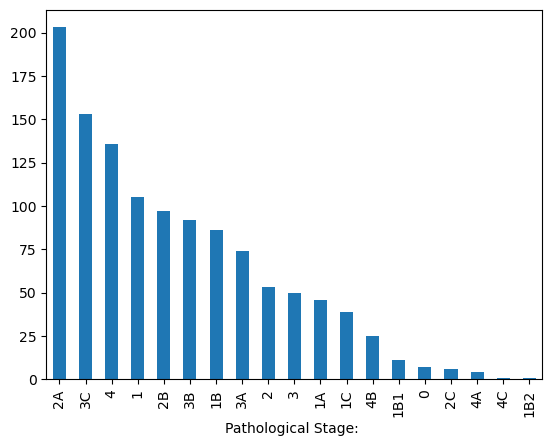

In [6]:
train['Pathological Stage: '].value_counts().plot.bar()

['3B' '4B' '2' '2A' '1B' '1A' '4' '2B' '3C' '3A' '1' '4A' '0' '3' '1B1'
 '1C' '4C' '2C' '1B2']


<Axes: xlabel='Pathological Stage: '>

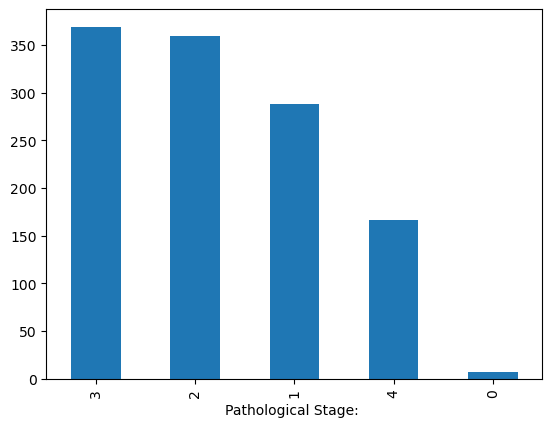

In [7]:
print(train['Pathological Stage: '].unique())
# Define a dictionary to map cancer stages to numerical categories
stage_mapping = {
    '0': 0,
    '1': 1,
    '1A': 1,
    '1B': 1,
    '1B1': 1,
    '1B2': 1,
    '1C': 1,
    '2': 2,
    '2A': 2,
    '2B': 2,
    '2C': 2,
    '3': 3,
    '3A': 3,
    '3B': 3,
    '3C': 3,
    '4': 4,
    '4A': 4,
    '4B': 4,
    '4C': 4
}

# Map the cancer stages using the defined mapping
train['Pathological Stage: '] = train['Pathological Stage: '].map(stage_mapping)
train['Pathological Stage: '].value_counts().plot.bar()

# Identify Missing Values with : isnull + sum



In [8]:
train.info()
train.isnull().sum()
# train.isnull().sum().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Columns: 54677 entries, Unnamed: 0 to Pathological Stage: 
dtypes: float64(54675), int64(1), object(1)
memory usage: 496.0+ MB


Unnamed: 0              0
1007_s_at               0
1053_at                 0
117_at                  0
121_at                  0
                       ..
AFFX-ThrX-M_at          0
AFFX-TrpnX-3_at         0
AFFX-TrpnX-5_at         0
AFFX-TrpnX-M_at         0
Pathological Stage:     0
Length: 54677, dtype: int64

# Divide Data into X and y


In [9]:
y = train['Pathological Stage: ']
X = train.drop(['Pathological Stage: ','Unnamed: 0'], axis = 1)
X.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,4245.4,657.3,315.8,442.8,9.2,658.4,126.4,129.1,213.7,151.6,...,14156.7,12947.9,46503.8,31658.1,983.9,431.7,677.4,4.3,53.4,14.4
1,1329.5,442.5,206.7,1517.2,49.9,1343.5,153.9,221.8,4476.7,107.4,...,19986.3,18525.0,73099.0,46868.6,720.8,296.9,570.0,5.2,66.6,17.4
2,2609.8,330.5,138.5,483.1,22.5,706.4,84.4,77.2,376.6,72.6,...,20111.3,19533.3,45950.0,35149.2,1033.7,432.2,701.1,1.2,5.8,5.7
3,3258.3,631.7,698.7,873.5,59.4,511.8,80.3,167.0,258.9,124.5,...,14946.5,13649.5,45952.3,34540.5,822.5,367.6,525.9,3.0,52.1,17.9
4,4195.7,959.1,478.6,495.9,74.3,470.2,151.1,18.6,1645.3,19.7,...,19499.1,19413.2,50866.3,34463.2,797.9,443.5,623.3,3.3,37.3,11.7


# feature scaling

In [10]:
min_values = np.min(X, axis=0)
max_values = np.max(X, axis=0)
print('min values')
print(min_values)
print('max values')
print(max_values)

min values
1007_s_at          288.7
1053_at             48.8
117_at               7.0
121_at             244.3
1255_g_at            3.4
                   ...  
AFFX-ThrX-5_at       2.0
AFFX-ThrX-M_at       2.0
AFFX-TrpnX-3_at      1.2
AFFX-TrpnX-5_at      3.6
AFFX-TrpnX-M_at      1.3
Length: 54675, dtype: float64
max values
1007_s_at          20043.2
1053_at             2076.8
117_at              5955.2
121_at             13980.4
1255_g_at            880.6
                    ...   
AFFX-ThrX-5_at     20411.6
AFFX-ThrX-M_at     26604.6
AFFX-TrpnX-3_at      221.1
AFFX-TrpnX-5_at      322.5
AFFX-TrpnX-M_at      307.2
Length: 54675, dtype: float64


## Identify Categorical Features


In [11]:
categorical_features = train.select_dtypes(include = ['object']).columns.values
categorical_features

array(['Unnamed: 0'], dtype=object)

## Identify Numerical Features


In [12]:
numerical_features = X.select_dtypes(include = ['int64','float64']).columns.values
numerical_features

array(['1007_s_at', '1053_at', '117_at', ..., 'AFFX-TrpnX-3_at',
       'AFFX-TrpnX-5_at', 'AFFX-TrpnX-M_at'], dtype=object)

# Identify Missing Values with : percentage of missing values



In [13]:
missing_values_proportion = train.isnull().sum() / len(train)
threshold = 0.3

# Filter columns with more than 30% missing values
columns_with_more_than_30_percent_missing = missing_values_proportion[missing_values_proportion >= threshold]

print("Features with more than 30% missing values:")
print(columns_with_more_than_30_percent_missing)

# Filter columns with missing values between 10% and 30%
condition = (missing_values_proportion > 0) & (missing_values_proportion <= 0.3)
columns_with_missing_values_between_10_and_30_percent = missing_values_proportion[condition].index

# Print the columns with missing values between 10% and 30%
print("features with missing values between 10% and 30%:")
print(columns_with_missing_values_between_10_and_30_percent)


Features with more than 30% missing values:
Series([], dtype: float64)
features with missing values between 10% and 30%:
Index([], dtype='object')


# Impute Missing Values ( Numerical Features)



# Eliminate Features with > 30% Missing Values

In [14]:
# Drop columns with more than 30% missing values
train = train.drop(columns=columns_with_more_than_30_percent_missing.index)

# KNN imputation less than 30%

If you didn’t specify ‘k’, the KNNImputer defaults to using 5 nearest neighbors

In [15]:
numerical_columns_with_less_than_30_percent_missing = missing_values_proportion[(missing_values_proportion < threshold) & X[numerical_features].isnull().any()].index

if len(numerical_columns_with_less_than_30_percent_missing) > 0:
    num_imputer = KNNImputer()
    X[numerical_columns_with_less_than_30_percent_missing] = num_imputer.fit_transform(X[numerical_columns_with_less_than_30_percent_missing])


# Check

In [16]:
X.isnull().sum()

1007_s_at          0
1053_at            0
117_at             0
121_at             0
1255_g_at          0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54675, dtype: int64

In [17]:
# Check if there are any missing values in the specified numerical columns after KNN imputation
if X[numerical_columns_with_less_than_30_percent_missing].isnull().any().any():
    print(X[numerical_columns_with_less_than_30_percent_missing].isnull().sum().sum())
else:
    print(0)


0


In [18]:
# Concatenate 'SampleID', y (target variable), and the imputed X DataFrame
imputed_train = pd.concat([train['Unnamed: 0'], y, X], axis=1)
print(imputed_train.head())


  Unnamed: 0  Pathological Stage:   1007_s_at  1053_at  117_at  121_at  \
0   GSM38051                     3     4245.4    657.3   315.8   442.8   
1   GSM38052                     4     1329.5    442.5   206.7  1517.2   
2   GSM38053                     2     2609.8    330.5   138.5   483.1   
3   GSM38055                     3     3258.3    631.7   698.7   873.5   
4   GSM38057                     2     4195.7    959.1   478.6   495.9   

   1255_g_at  1294_at  1316_at  1320_at  ...  AFFX-r2-Ec-bioD-3_at  \
0        9.2    658.4    126.4    129.1  ...               14156.7   
1       49.9   1343.5    153.9    221.8  ...               19986.3   
2       22.5    706.4     84.4     77.2  ...               20111.3   
3       59.4    511.8     80.3    167.0  ...               14946.5   
4       74.3    470.2    151.1     18.6  ...               19499.1   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0               12947.9              46503.8              31658.1

# Export Imputed Features


In [19]:
imputed_train.to_csv('GSE2109_series_matrix_imputed.csv')

# Apply log transformation to numerical features

In [20]:
# Find features with negative or zero values
neg_zero_features = imputed_train[numerical_features].columns[(imputed_train[numerical_features] <= 0).any()]
print(neg_zero_features)

# Shift negative or zero values to ensure all values are positive
imputed_train[neg_zero_features] += abs(imputed_train[neg_zero_features].min()) + 1

# Apply log transformation to numerical features
imputed_train[numerical_features] = np.log1p(imputed_train[numerical_features])

# Display the head of the imputed_train DataFrame after log transformation
print(imputed_train.head())


Index([], dtype='object')
  Unnamed: 0  Pathological Stage:   1007_s_at   1053_at    117_at    121_at  \
0   GSM38051                     3   8.353827  6.489661  5.758271  6.095374   
1   GSM38052                     4   7.193310  6.094698  5.336095  7.325281   
2   GSM38053                     2   7.867412  5.803628  4.938065  6.182291   
3   GSM38055                     3   8.089268  6.449996  6.550652  6.773652   
4   GSM38057                     2   8.342054  6.867037  6.172952  6.208389   

   1255_g_at   1294_at   1316_at   1320_at  ...  AFFX-r2-Ec-bioD-3_at  \
0   2.322388  6.491330  4.847332  4.868303  ...              9.558014   
1   3.929863  7.203777  5.042780  5.406275  ...              9.902852   
2   3.157000  6.561596  4.447346  4.359270  ...              9.909087   
3   4.100989  6.239886  4.398146  5.123964  ...              9.612299   
4   4.321480  6.155283  5.024538  2.975530  ...              9.878175   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre

# New range after LOG

In [21]:
min_values_log = imputed_train[numerical_features].min()
max_values_log = imputed_train[numerical_features].max()

print('Min values after log transformation:')
print(min_values_log)
print('\nMax values after log transformation:')
print(max_values_log)



Min values after log transformation:
1007_s_at          5.668846
1053_at            3.908015
117_at             2.079442
121_at             5.502482
1255_g_at          1.481605
                     ...   
AFFX-ThrX-5_at     1.098612
AFFX-ThrX-M_at     1.098612
AFFX-TrpnX-3_at    0.788457
AFFX-TrpnX-5_at    1.526056
AFFX-TrpnX-M_at    0.832909
Length: 54675, dtype: float64

Max values after log transformation:
1007_s_at           9.905695
1053_at             7.639065
117_at              8.692188
121_at              9.545483
1255_g_at           6.781738
                     ...    
AFFX-ThrX-5_at      9.923908
AFFX-ThrX-M_at     10.188877
AFFX-TrpnX-3_at     5.403128
AFFX-TrpnX-5_at     5.779199
AFFX-TrpnX-M_at     5.730749
Length: 54675, dtype: float64


# visualize the effects of the log transformation

# For few features

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

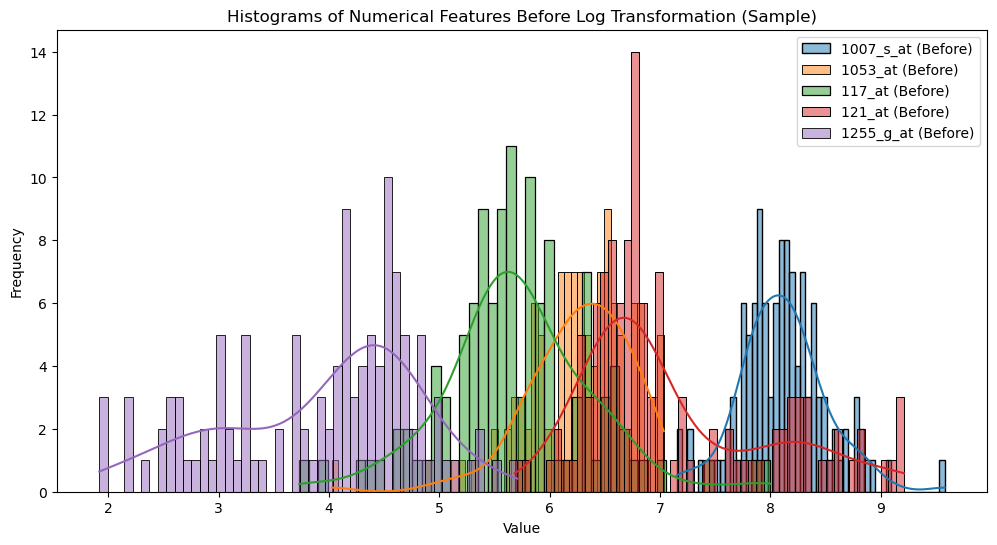

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

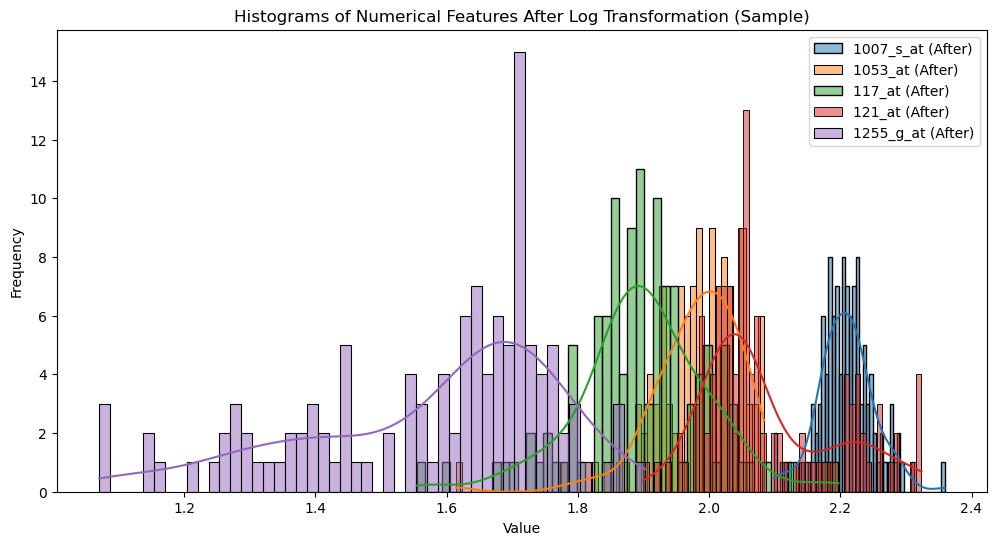

Summary Statistics Before Log Transformation:
        1007_s_at     1053_at      117_at      121_at   1255_g_at
count  119.000000  119.000000  119.000000  119.000000  119.000000
mean     8.111824    6.273243    5.709738    7.107296    3.934747
std      0.391838    0.477291    0.678725    0.840328    0.878445
min      7.151564    4.025352    3.730501    5.682559    1.916923
25%      7.874298    5.997430    5.360351    6.553005    3.238648
50%      8.093004    6.312279    5.661918    6.791783    4.154185
75%      8.320079    6.590678    6.012953    7.615995    4.551609
max      9.582069    7.034476    7.998201    9.212059    5.706113

Summary Statistics After Log Transformation:
        1007_s_at     1053_at      117_at      121_at   1255_g_at
count  119.000000  119.000000  119.000000  119.000000  119.000000
mean     2.208663    1.981921    1.898473    2.087717    1.578858
std      0.042776    0.069088    0.101613    0.099585    0.192952
min      2.098210    1.614495    1.554031    1.899

In [22]:
# Select a subset of numerical features and a sample of the data
sample_numerical_features = numerical_features[:5]
sample_data = imputed_train.sample(frac=0.1, random_state=42)

# Plot histograms of numerical features before log transformation
plt.figure(figsize=(12, 6))
for feature in sample_numerical_features:
    sns.histplot(sample_data[feature], bins=50, alpha=0.5, label=feature + " (Before)", kde=True)
plt.title("Histograms of Numerical Features Before Log Transformation (Sample)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot histograms of numerical features after log transformation
plt.figure(figsize=(12, 6))
for feature in sample_numerical_features:
    sns.histplot(np.log1p(sample_data[feature]), bins=50, alpha=0.5, label=feature + " (After)", kde=True)
plt.title("Histograms of Numerical Features After Log Transformation (Sample)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Print summary statistics for each numerical feature
print("Summary Statistics Before Log Transformation:")
print(sample_data[sample_numerical_features].describe())
print("\nSummary Statistics After Log Transformation:")
print(np.log1p(sample_data[sample_numerical_features]).describe())


# another aproach to hundle pos and neg and 0 values  with log

In [23]:
# Find the minimum value across numerical features
min_value = imputed_train[numerical_features].min().min()

# If the minimum value is negative, add its absolute value plus 1 to all values
if min_value < 0:
    offset = np.abs(min_value) + 1
    imputed_train[numerical_features] += offset

imputed_train[numerical_features] = np.log1p(imputed_train[numerical_features])

print(imputed_train.head())


  Unnamed: 0  Pathological Stage:   1007_s_at   1053_at    117_at    121_at  \
0   GSM38051                     3   2.235786  2.013524  1.910767  1.959443   
1   GSM38052                     4   2.103318  1.959348  1.846263  2.119297   
2   GSM38053                     2   2.182383  1.917456  1.781383  1.971618   
3   GSM38055                     3   2.207094  2.008214  2.021634  2.050740   
4   GSM38057                     2   2.234526  2.062682  1.970317  1.975245   

   1255_g_at   1294_at   1316_at   1320_at  ...  AFFX-r2-Ec-bioD-3_at  \
0   1.200684  2.013746  1.765985  1.769566  ...              2.356885   
1   1.595311  2.104595  1.798864  1.857278  ...              2.389024   
2   1.424794  2.023082  1.695129  1.678828  ...              2.389596   
3   1.629434  1.979605  1.686056  1.812210  ...              2.362014   
4   1.671751  1.967851  1.795841  1.380158  ...              2.386758   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0              2.

# Check if any new missing values were generated after log

In [24]:
missing_values_after = imputed_train.isnull().sum()

if (missing_values_after > 0).any():
    print("New missing values were generated after the log transformation:")
    print(missing_values_after[missing_values_after > 0])
else:
    print("No new missing values were generated after the log transformation.")


No new missing values were generated after the log transformation.


# apply yeojohnson transformation for hundle outliers 

In [25]:
from scipy.optimize import minimize_scalar

# Define the Yeo-Johnson transformation function
def yeojohnson_transform(x, lmbda):
    if lmbda == 0:
        return np.log1p(x)
    else:
        return np.where(x >= 0, (x ** lmbda - 1) / lmbda, -((-x) ** lmbda - 1) / lmbda)

# Define the negative log-likelihood function for Yeo-Johnson transformation
def neg_llf(lmbda, data):
    y = yeojohnson_transform(data, lmbda)
    llf = _yeojohnson_llf(lmbda, data)  # You need to implement this function
    if llf is None:
        return float('inf')  # Return a large value to indicate failure
    return -llf

# Define the negative log-likelihood function specific to Yeo-Johnson
def _yeojohnson_llf(lmbda, data):
    # Implement the log-likelihood function based on your specific requirements
    pass

# Apply the Yeo-Johnson transformation to numerical features
for col in numerical_features:
    # Optimize lambda parameter using a custom initial point
    res = minimize_scalar(neg_llf, args=(imputed_train[col],), method='bounded', bounds=(-2, 2))
    lmbda = res.x
    transformed_data = yeojohnson_transform(imputed_train[col], lmbda)
    imputed_train[col] = transformed_data






# check if there is still outliers

In [26]:

numerical_columns = imputed_train.select_dtypes(include=['int64', 'float64']).columns


outliers_info = {}

for col in numerical_columns:
    z_scores = zscore(imputed_train[col])
    outliers_mask = (z_scores > threshold) | (z_scores < -threshold)
    if outliers_mask.any():
        outliers_info[col] = outliers_mask.sum()

print("Columns with outliers:")
for col, count in outliers_info.items():
    print(f"Column '{col}' has {count} outliers.")
    
    
    
    
    
    num_columns_with_outliers = len(outliers_info)
print("Number of columns with outliers:", num_columns_with_outliers)

Columns with outliers:
Column 'Pathological Stage: ' has 1189 outliers.
Column '1007_s_at' has 853 outliers.
Column '1053_at' has 866 outliers.
Column '117_at' has 869 outliers.
Column '121_at' has 941 outliers.
Column '1255_g_at' has 941 outliers.
Column '1294_at' has 908 outliers.
Column '1316_at' has 879 outliers.
Column '1320_at' has 1007 outliers.
Column '1405_i_at' has 901 outliers.
Column '1431_at' has 830 outliers.
Column '1438_at' has 845 outliers.
Column '1487_at' has 895 outliers.
Column '1494_f_at' has 775 outliers.
Column '1552256_a_at' has 905 outliers.
Column '1552257_a_at' has 923 outliers.
Column '1552258_at' has 837 outliers.
Column '1552261_at' has 851 outliers.
Column '1552263_at' has 843 outliers.
Column '1552264_a_at' has 861 outliers.
Column '1552266_at' has 873 outliers.
Column '1552269_at' has 941 outliers.
Column '1552271_at' has 877 outliers.
Column '1552272_a_at' has 875 outliers.
Column '1552274_at' has 829 outliers.
Column '1552275_s_at' has 824 outliers.


# imputation after transformation 

In [27]:
# Perform imputation on the transformed data
imputer = KNNImputer()

missing_values = imputed_train[numerical_features].isnull().sum()
if missing_values.sum() > 0:
    print("New missing values were generated after the Yeo-Johnson transformation.")

    # Step 2: Filter numerical features with missing values
    features_with_missing_values = missing_values[missing_values > 0].index

    # Step 3: Impute missing values using 

    imputed_train[features_with_missing_values] = imputer.fit_transform(imputed_train[features_with_missing_values])

    # Step 4: Verify if missing values are filled after imputation
    missing_values_after_imputation = imputed_train[numerical_features].isnull().sum()
    if missing_values_after_imputation.sum() == 0:
        print("Imputation successful. No missing values remain.")
    else:
        print("Imputation unsuccessful. Missing values persist after imputation.")
else:
    print("No new missing values were generated after Yeo-Johnson transformation.")


No new missing values were generated after Yeo-Johnson transformation.


In [28]:
# Save the DataFrame to a new CSV file after log transformation
imputed_train.to_csv('GSE2109_series_matrix_imputed_log.csv', index=False)